In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

In [2]:
%matplotlib notebook

In [3]:
#data

# profile_array_1 = np.loadtxt('Profile_array.csv')

avg_h = np.loadtxt('h_f.csv')
rms = np.loadtxt('rms_f.csv')
# rms_f.csv

In [4]:
def create_profile(layer_lengths_array):
    # create two points for every layer 
    xvals = []
    yvals = []
    mymaxheight = (layer_lengths_array.shape)[0]
    for int in range(0,mymaxheight):
        my_layer_length = layer_lengths_array[int]
        if(my_layer_length == 0): break
        xvals = np.append(xvals, [my_layer_length, my_layer_length])
        yvals = np.append(yvals, [int, int+1])
    xvals = np.append(xvals, [0])
    yvals = np.append(yvals, [int])
    return [xvals, yvals]

In [5]:
# colors = ['royalblue','orange','maroon','green','red','purple','sandybrown','black','deeppink','teal','blue']

In [6]:
from scipy.optimize import curve_fit

In [7]:
def p_law(x,a,b):
    return a*x**b

<IPython.core.display.Javascript object>


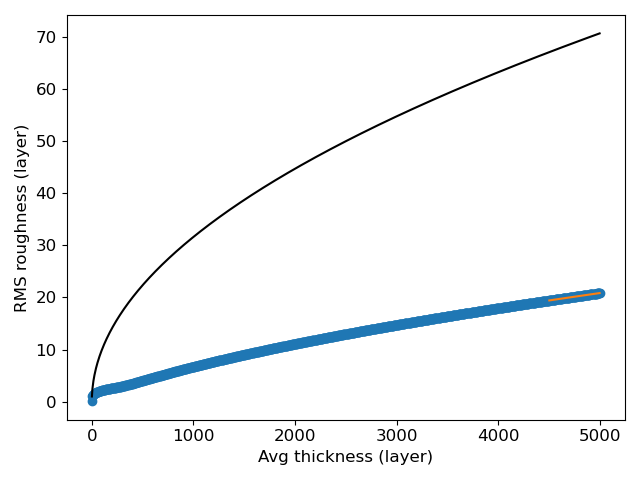

[0.06897442 0.67059883]


In [9]:
plt.figure()

plt.plot(avg_h,rms,'o',label='Ls = 0.03, Lc = 0.5')
plt.plot(avg_h,np.sqrt(avg_h),color='black',label='RD')


i,j = 900,1000

popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
print(popt)
fit = p_law(avg_h[i:j],*popt)

plt.plot(avg_h[i:j],fit,label = 'fit')

# plt.xscale('log')
# plt.yscale('log')


plt.xlabel('Avg thickness (layer)',fontsize=12)
plt.ylabel('RMS roughness (layer)',fontsize=12)
plt.tick_params(labelsize=12)

plt.tight_layout()


In [32]:
avg_h_3p5 = np.loadtxt('avg_h_3.5_15k.csv')
rms_3p5 = np.loadtxt('rms_3.5_15k.csv')

avg_h_6 = np.loadtxt('avg_h_6_15k.csv')
rms_6 = np.loadtxt('rms_6_15k.csv')

avg_h_15 = np.loadtxt('avg_h_15_15k.csv')
rms_15 = np.loadtxt('rms_15_15k.csv')

<IPython.core.display.Javascript object>


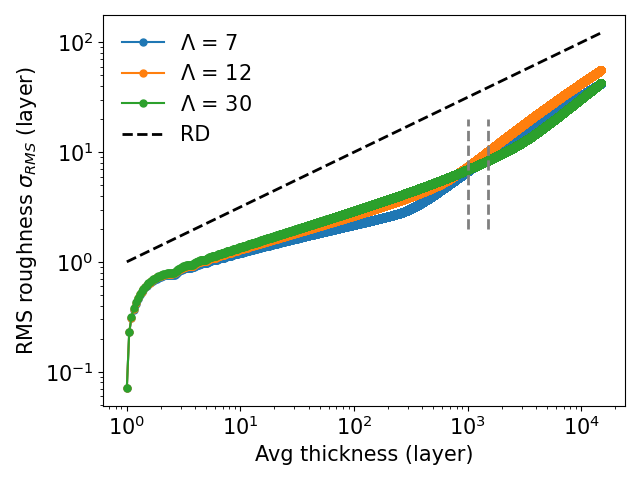

In [33]:
plt.figure()

plt.plot(avg_h_3p5[::10],rms_3p5[::10],'-o',ms=5,label='$\Lambda$ = 7')
plt.plot(avg_h_6[::10],rms_6[::10],'-o',ms=5,label='$\Lambda$ = 12')
plt.plot(avg_h_15[::10],rms_15[::10],'-o',ms=5,label='$\Lambda$ = 30')

plt.plot(avg_h_3p5[::1000],np.sqrt(avg_h_3p5[::1000]),'--',lw=2,color='black',label='RD')


plt.vlines(1500,2,20,ls='--',lw=2,color='grey')
plt.vlines(1000,2,20,ls='--',lw=2,color='grey')
# i = 0
# j = i+100000

# popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# print(popt)
# fit = p_law(avg_h[i:j],*popt)

# plt.plot(avg_h[i:j],fit)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel('RMS roughness $\sigma_{RMS}$ (layer)',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

# plt.savefig('Zeno_long_test_no_B.png',dpi=150)

In [34]:
p_list_3p5 = []
beta_list_3p5 = []

for i in range(int(len(avg_h_3p5)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_3p5[begin:end], rms_3p5[begin:end])
    p_list_3p5.append(popt[0])
    beta_list_3p5.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_3p5[begin],avg_h_3p5[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_3p5[-100000:], rms_3p5[-100000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_3p5[-100000],avg_h_3p5[-1],popt[0],popt[1]))
p_list_3p5.append(popt[0])
beta_list_3p5.append(popt[1])

1-501 layers: prefactor= 0.447; beta = 0.341
501-1001 layers: prefactor= 0.042; beta = 0.736
1001-1501 layers: prefactor= 0.043; beta = 0.732
1501-2001 layers: prefactor= 0.048; beta = 0.716
2001-2501 layers: prefactor= 0.052; beta = 0.704
2501-3001 layers: prefactor= 0.057; beta = 0.695
3001-3501 layers: prefactor= 0.060; beta = 0.687
3501-4001 layers: prefactor= 0.063; beta = 0.681
4001-4501 layers: prefactor= 0.066; beta = 0.675
4501-5001 layers: prefactor= 0.069; beta = 0.671
5001-5501 layers: prefactor= 0.071; beta = 0.667
5501-6001 layers: prefactor= 0.074; beta = 0.663
6001-6501 layers: prefactor= 0.076; beta = 0.659
6501-7001 layers: prefactor= 0.078; beta = 0.656
7001-7501 layers: prefactor= 0.080; beta = 0.653
7501-8001 layers: prefactor= 0.082; beta = 0.651
8001-8501 layers: prefactor= 0.084; beta = 0.648
8501-9001 layers: prefactor= 0.086; beta = 0.646
9001-9501 layers: prefactor= 0.087; beta = 0.644
9501-10001 layers: prefactor= 0.089; beta = 0.642
10001-10501 layers: pref

In [35]:
p_list_6 = []
beta_list_6 = []

for i in range(int(len(avg_h_6)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_6[begin:end], rms_6[begin:end])
    p_list_6.append(popt[0])
    beta_list_6.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6[begin],avg_h_6[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_6[-100000:], rms_6[-100000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6[-100000],avg_h_6[-1],popt[0],popt[1]))
p_list_6.append(popt[0])
beta_list_6.append(popt[1])

1-501 layers: prefactor= 0.528; beta = 0.351
501-1001 layers: prefactor= 0.082; beta = 0.649
1001-1501 layers: prefactor= 0.033; beta = 0.783
1501-2001 layers: prefactor= 0.030; beta = 0.796
2001-2501 layers: prefactor= 0.032; beta = 0.789
2501-3001 layers: prefactor= 0.034; beta = 0.779
3001-3501 layers: prefactor= 0.037; beta = 0.769
3501-4001 layers: prefactor= 0.040; beta = 0.760
4001-4501 layers: prefactor= 0.043; beta = 0.752
4501-5001 layers: prefactor= 0.045; beta = 0.745
5001-5501 layers: prefactor= 0.048; beta = 0.739
5501-6001 layers: prefactor= 0.050; beta = 0.733
6001-6501 layers: prefactor= 0.052; beta = 0.729
6501-7001 layers: prefactor= 0.054; beta = 0.724
7001-7501 layers: prefactor= 0.056; beta = 0.720
7501-8001 layers: prefactor= 0.058; beta = 0.717
8001-8501 layers: prefactor= 0.060; beta = 0.713
8501-9001 layers: prefactor= 0.061; beta = 0.710
9001-9501 layers: prefactor= 0.063; beta = 0.707
9501-10001 layers: prefactor= 0.065; beta = 0.704
10001-10501 layers: pref

In [36]:
p_list_15 = []
beta_list_15 = []

for i in range(int(len(avg_h_15)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_15[begin:end], rms_15[begin:end])
    p_list_15.append(popt[0])
    beta_list_15.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_15[begin],avg_h_15[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_15[-100000:], rms_15[-100000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_15[-100000],avg_h_15[-1],popt[0],popt[1]))
p_list_15.append(popt[0])
beta_list_15.append(popt[1])

1-501 layers: prefactor= 0.574; beta = 0.353
501-1001 layers: prefactor= 0.387; beta = 0.417
1001-1501 layers: prefactor= 0.278; beta = 0.465
1501-2001 layers: prefactor= 0.206; beta = 0.506
2001-2501 layers: prefactor= 0.156; beta = 0.543
2501-3001 layers: prefactor= 0.110; beta = 0.588
3001-3501 layers: prefactor= 0.061; beta = 0.661
3501-4001 layers: prefactor= 0.040; beta = 0.712
4001-4501 layers: prefactor= 0.030; beta = 0.747
4501-5001 layers: prefactor= 0.025; beta = 0.770
5001-5501 layers: prefactor= 0.022; beta = 0.787
5501-6001 layers: prefactor= 0.020; beta = 0.798
6001-6501 layers: prefactor= 0.018; beta = 0.806
6501-7001 layers: prefactor= 0.017; beta = 0.811
7001-7501 layers: prefactor= 0.017; beta = 0.815
7501-8001 layers: prefactor= 0.017; beta = 0.817
8001-8501 layers: prefactor= 0.016; beta = 0.819
8501-9001 layers: prefactor= 0.016; beta = 0.819
9001-9501 layers: prefactor= 0.016; beta = 0.819
9501-10001 layers: prefactor= 0.016; beta = 0.819
10001-10501 layers: pref

<IPython.core.display.Javascript object>


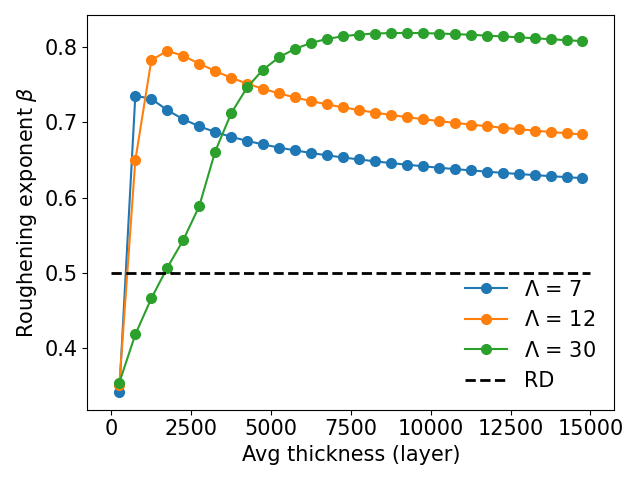

In [39]:
t_list = np.arange(250,15250,500)

plt.figure()

plt.plot(t_list,beta_list_3p5,'-o',ms=7,label='$\Lambda$ = 7')
plt.plot(t_list,beta_list_6,'-o',ms=7,label='$\Lambda$ = 12')
plt.plot(t_list,beta_list_15,'-o',ms=7,label='$\Lambda$ = 30')

plt.hlines(0.5,0,15000,ls='--',lw=2,color='black',label='RD')


plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel(r'Roughening exponent $\beta$',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

# plt.savefig('Zeno_long_test_no_B_beta.png',dpi=150)

<IPython.core.display.Javascript object>


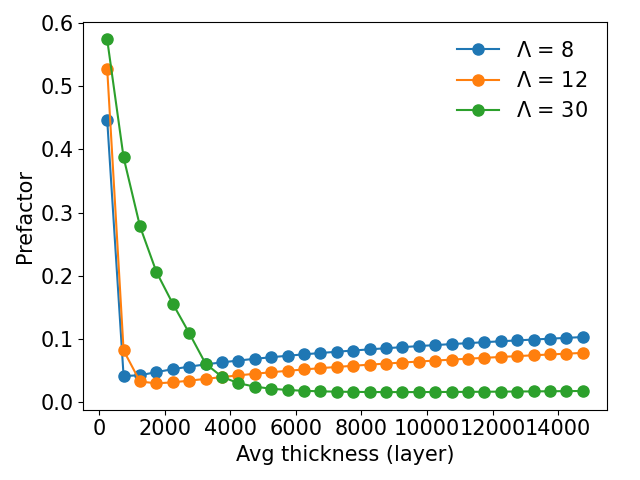

In [45]:
t_list = np.arange(250,15250,500)

plt.figure()

plt.plot(t_list,p_list_3p5,'-o',ms=8,label='$\Lambda$ = 7')
plt.plot(t_list,p_list_6,'-o',ms=8,label='$\Lambda$ = 12')
plt.plot(t_list,p_list_15,'-o',ms=8,label='$\Lambda$ = 30')

# plt.hlines(1,0,15000,ls='--',lw=2,color='black',label='RD')


plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel('Prefactor',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

In [8]:
avg_h_3p5_ls02 = np.loadtxt('avg_h_3p5_ls02_15k.csv')
rms_3p5_ls02 = np.loadtxt('rms_3p5_ls02_15k.csv')


In [14]:
plt.figure()

plt.plot(avg_h_3p5_ls02[::10],rms_3p5_ls02[::10],'-o',ms=5,label='$\Lambda$ = 7, $L_{s}$ = 0.2')


plt.plot(avg_h_3p5_ls02[::1000],np.sqrt(avg_h_3p5_ls02[::1000]),'--',lw=2,color='black',label='RD')


# plt.vlines(1500,2,20,ls='--',lw=2,color='grey')
# plt.vlines(1000,2,20,ls='--',lw=2,color='grey')
# # i = 0
# j = i+100000

# popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# print(popt)
# fit = p_law(avg_h[i:j],*popt)

# plt.plot(avg_h[i:j],fit)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel('RMS roughness $\sigma_{RMS}$ (layer)',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

plt.savefig('Zeno_long_test_no_B_ls02.png',dpi=150)

<IPython.core.display.Javascript object>

In [11]:
p_list_3p5_ls02 = []
beta_list_3p5_ls02 = []

for i in range(int(len(avg_h_3p5_ls02)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_3p5_ls02[begin:end], rms_3p5_ls02[begin:end])
    p_list_3p5_ls02.append(popt[0])
    beta_list_3p5_ls02.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_3p5_ls02[begin],avg_h_3p5_ls02[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_3p5_ls02[-100000:], rms_3p5_ls02[-100000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_3p5_ls02[-100000],avg_h_3p5_ls02[-1],popt[0],popt[1]))
p_list_3p5_ls02.append(popt[0])
beta_list_3p5_ls02.append(popt[1])

1-501 layers: prefactor= 0.317; beta = 0.628
501-1001 layers: prefactor= 0.405; beta = 0.588
1001-1501 layers: prefactor= 0.456; beta = 0.571
1501-2001 layers: prefactor= 0.490; beta = 0.561
2001-2501 layers: prefactor= 0.515; beta = 0.554
2501-3001 layers: prefactor= 0.535; beta = 0.550
3001-3501 layers: prefactor= 0.551; beta = 0.546
3501-4001 layers: prefactor= 0.564; beta = 0.543
4001-4501 layers: prefactor= 0.576; beta = 0.540
4501-5001 layers: prefactor= 0.586; beta = 0.538
5001-5501 layers: prefactor= 0.595; beta = 0.537
5501-6001 layers: prefactor= 0.603; beta = 0.535
6001-6501 layers: prefactor= 0.610; beta = 0.534
6501-7001 layers: prefactor= 0.617; beta = 0.532
7001-7501 layers: prefactor= 0.623; beta = 0.531
7501-8001 layers: prefactor= 0.628; beta = 0.530
8001-8501 layers: prefactor= 0.633; beta = 0.529
8501-9001 layers: prefactor= 0.638; beta = 0.529
9001-9501 layers: prefactor= 0.642; beta = 0.528
9501-10001 layers: prefactor= 0.646; beta = 0.527
10001-10501 layers: pref

<IPython.core.display.Javascript object>


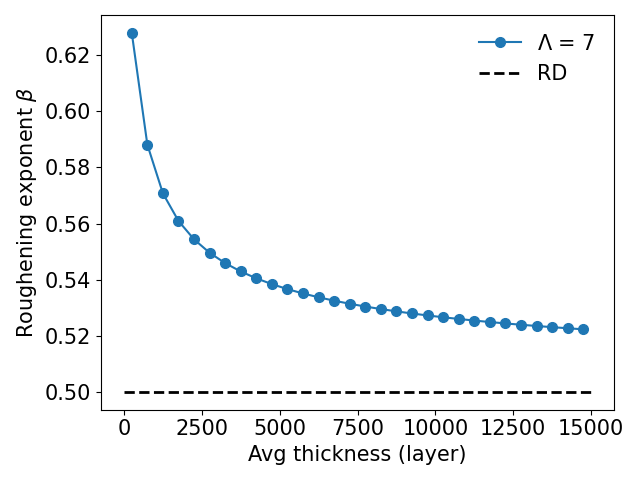

In [13]:
t_list = np.arange(250,15250,500)

plt.figure()

plt.plot(t_list,beta_list_3p5_ls02,'-o',ms=7,label='$\Lambda$ = 7')

plt.hlines(0.5,0,15000,ls='--',lw=2,color='black',label='RD')


plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel(r'Roughening exponent $\beta$',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

# plt.savefig('Zeno_long_test_no_B_beta.png',dpi=150)

In [18]:
avg_h_6_B001 = np.loadtxt('avg_h_6_B001_15k.csv')
rms_6_B001 = np.loadtxt('rms_6_B001_15k.csv')

avg_h_6_B002 = np.loadtxt('avg_h_6_B002_15k.csv')
rms_6_B002 = np.loadtxt('rms_6_B002_15k.csv')

avg_h_6_B003 = np.loadtxt('avg_h_6_B003_15k.csv')
rms_6_B003 = np.loadtxt('rms_6_B003_15k.csv')

<IPython.core.display.Javascript object>


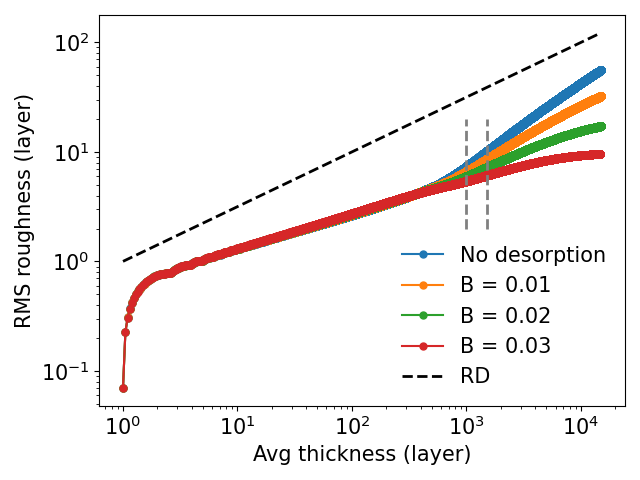

In [40]:
plt.figure()

plt.plot(avg_h_6[::10],rms_6[::10],'-o',ms=5,label='No desorption')
plt.plot(avg_h_6_B001[::10],rms_6_B001[::10],'-o',ms=5,label='B = 0.01')
plt.plot(avg_h_6_B002[::10],rms_6_B002[::10],'-o',ms=5,label='B = 0.02')
plt.plot(avg_h_6_B003[::10],rms_6_B003[::10],'-o',ms=5,label='B = 0.03')



plt.plot(avg_h_3p5[::1000],np.sqrt(avg_h_3p5[::1000]),'--',lw=2,color='black',label='RD')


plt.vlines(1500,2,20,ls='--',lw=2,color='grey')
plt.vlines(1000,2,20,ls='--',lw=2,color='grey')
# i = 0
# j = i+100000

# popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# print(popt)
# fit = p_law(avg_h[i:j],*popt)

# plt.plot(avg_h[i:j],fit)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel('RMS roughness (layer)',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

# plt.savefig('Zeno_long_test_B.png',dpi=150)

In [20]:
p_list_6_B001 = []
beta_list_6_B001 = []

p0 = [0.02,0.5]

for i in range(int(len(avg_h_6_B001)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_6_B001[begin:end], rms_6_B001[begin:end],p0)
    p_list_6_B001.append(popt[0])
    beta_list_6_B001.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6_B001[begin],avg_h_6_B001[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_6_B001[-100000:], rms_6_B001[-100000:],p0)
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6_B001[-100000],avg_h_6_B001[-1],popt[0],popt[1]))
p_list_6_B001.append(popt[0])
beta_list_6_B001.append(popt[1])

1-497 layers: prefactor= 0.562; beta = 0.340
497-994 layers: prefactor= 0.193; beta = 0.510
994-1492 layers: prefactor= 0.085; beta = 0.630
1492-1989 layers: prefactor= 0.076; beta = 0.646
1989-2486 layers: prefactor= 0.080; beta = 0.639
2486-2984 layers: prefactor= 0.087; beta = 0.628
2984-3481 layers: prefactor= 0.096; beta = 0.617
3481-3979 layers: prefactor= 0.105; beta = 0.606
3979-4477 layers: prefactor= 0.114; beta = 0.595
4477-4974 layers: prefactor= 0.123; beta = 0.586
4974-5472 layers: prefactor= 0.133; beta = 0.577
5472-5969 layers: prefactor= 0.142; beta = 0.569
5969-6467 layers: prefactor= 0.152; beta = 0.562
6467-6965 layers: prefactor= 0.161; beta = 0.555
6965-7462 layers: prefactor= 0.171; beta = 0.548
7462-7960 layers: prefactor= 0.181; beta = 0.542
7960-8458 layers: prefactor= 0.190; beta = 0.536
8458-8955 layers: prefactor= 0.200; beta = 0.531
8955-9453 layers: prefactor= 0.210; beta = 0.525
9453-9951 layers: prefactor= 0.221; beta = 0.520
9951-10448 layers: prefacto

In [21]:
p_list_6_B002 = []
beta_list_6_B002 = []

p0 = [0.2,0.3]

for i in range(int(len(avg_h_6_B002)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_6_B002[begin:end], rms_6_B002[begin:end],p0)
    p_list_6_B002.append(popt[0])
    beta_list_6_B002.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6_B002[begin],avg_h_6_B002[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_6_B002[-100000:], rms_6_B002[-100000:],p0)
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6_B002[-100000],avg_h_6_B002[-1],popt[0],popt[1]))
p_list_6_B002.append(popt[0])
beta_list_6_B002.append(popt[1])

1-494 layers: prefactor= 0.596; beta = 0.329
494-988 layers: prefactor= 0.448; beta = 0.374
988-1482 layers: prefactor= 0.243; beta = 0.463
1482-1977 layers: prefactor= 0.225; beta = 0.474
1977-2471 layers: prefactor= 0.240; beta = 0.466
2471-2966 layers: prefactor= 0.267; beta = 0.452
2966-3460 layers: prefactor= 0.300; beta = 0.437
3460-3955 layers: prefactor= 0.338; beta = 0.423
3955-4450 layers: prefactor= 0.379; beta = 0.409
4450-4944 layers: prefactor= 0.425; beta = 0.395
4944-5439 layers: prefactor= 0.473; beta = 0.383
5439-5934 layers: prefactor= 0.526; beta = 0.370
5934-6429 layers: prefactor= 0.581; beta = 0.359
6429-6923 layers: prefactor= 0.640; beta = 0.348
6923-7418 layers: prefactor= 0.703; beta = 0.337
7418-7913 layers: prefactor= 0.770; beta = 0.327
7913-8407 layers: prefactor= 0.840; beta = 0.317
8407-8902 layers: prefactor= 0.914; beta = 0.308
8902-9397 layers: prefactor= 0.992; beta = 0.299
9397-9892 layers: prefactor= 1.073; beta = 0.290
9892-10386 layers: prefacto

In [22]:
p_list_6_B003 = []
beta_list_6_B003 = []

p0 = [0.2,0.3]

for i in range(int(len(avg_h_6_B003)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h_6_B003[begin:end], rms_6_B003[begin:end],p0)
    p_list_6_B003.append(popt[0])
    beta_list_6_B003.append(popt[1])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6_B003[begin],avg_h_6_B003[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h_6_B003[-100000:], rms_6_B003[-100000:],p0)
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h_6_B003[-100000],avg_h_6_B003[-1],popt[0],popt[1]))
p_list_6_B003.append(popt[0])
beta_list_6_B003.append(popt[1])

1-490 layers: prefactor= 0.630; beta = 0.319
490-981 layers: prefactor= 0.972; beta = 0.248
981-1473 layers: prefactor= 0.709; beta = 0.294
1473-1964 layers: prefactor= 0.690; beta = 0.298
1964-2455 layers: prefactor= 0.748; beta = 0.288
2455-2947 layers: prefactor= 0.839; beta = 0.273
2947-3438 layers: prefactor= 0.953; beta = 0.257
3438-3930 layers: prefactor= 1.084; beta = 0.241
3930-4421 layers: prefactor= 1.231; beta = 0.226
4421-4913 layers: prefactor= 1.391; beta = 0.211
4913-5404 layers: prefactor= 1.564; beta = 0.197
5404-5896 layers: prefactor= 1.749; beta = 0.184
5896-6387 layers: prefactor= 1.945; beta = 0.172
6387-6879 layers: prefactor= 2.150; beta = 0.161
6879-7370 layers: prefactor= 2.363; beta = 0.150
7370-7862 layers: prefactor= 2.584; beta = 0.140
7862-8353 layers: prefactor= 2.811; beta = 0.130
8353-8845 layers: prefactor= 3.043; beta = 0.122
8845-9336 layers: prefactor= 3.278; beta = 0.113
9336-9828 layers: prefactor= 3.516; beta = 0.106
9828-10319 layers: prefacto

In [23]:
t_list_B001 = []
for i in range(int(len(avg_h_6_B001)/100000)-1):
    begin = i*100000
    t_list_B001.append(avg_h_6_B001[begin+100000//2])
t_list_B001.append(avg_h_6_B001[-100000//2])  

t_list_B002 = []
for i in range(int(len(avg_h_6_B002)/100000)-1):
    begin = i*100000
    t_list_B002.append(avg_h_6_B002[begin+100000//2])
t_list_B002.append(avg_h_6_B002[-100000//2])  

t_list_B003 = []
for i in range(int(len(avg_h_6_B003)/100000)-1):
    begin = i*100000
    t_list_B003.append(avg_h_6_B003[begin+100000//2])
t_list_B003.append(avg_h_6_B003[-100000//2])  

<IPython.core.display.Javascript object>


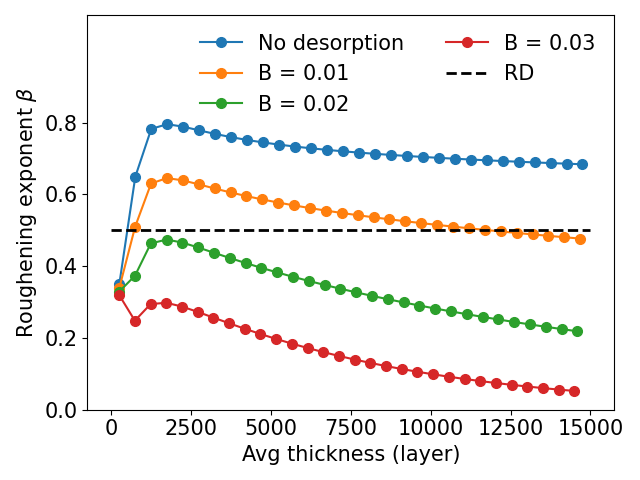

In [54]:
t_list = np.arange(250,15250,500)

plt.figure()

plt.plot(t_list,beta_list_6,'-o',ms=7,label='No desorption')
plt.plot(t_list_B001,beta_list_6_B001,'-o',ms=7,label='B = 0.01')
plt.plot(t_list_B002,beta_list_6_B002,'-o',ms=7,label='B = 0.02')
plt.plot(t_list_B003,beta_list_6_B003,'-o',ms=7,label='B = 0.03')


plt.hlines(0.5,0,15000,ls='--',lw=2,color='black',label='RD')

plt.ylim(0,1.1)

plt.yticks([0,0.2,0.4,0.6,0.8])

plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel(r'Roughening exponent $\beta$',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False,ncol=2,loc=1)

plt.tight_layout()

# plt.savefig('Zeno_long_test_B_beta.png',dpi=150)

<IPython.core.display.Javascript object>


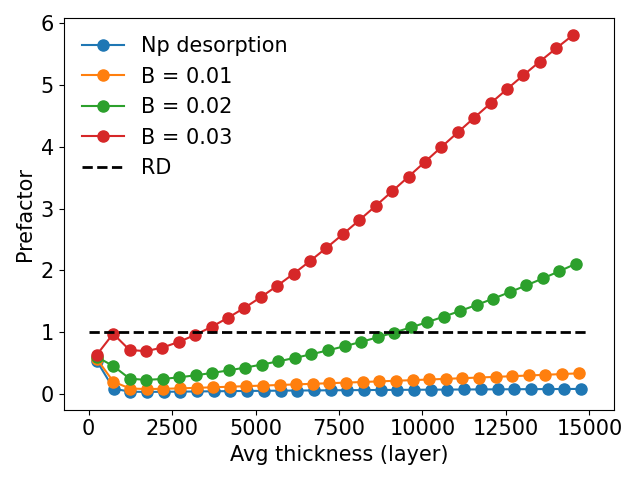

In [25]:
t_list = np.arange(250,15250,500)

plt.figure()

plt.plot(t_list,p_list_6,'-o',ms=8,label='Np desorption')
plt.plot(t_list_B001,p_list_6_B001,'-o',ms=8,label='B = 0.01')
plt.plot(t_list_B002,p_list_6_B002,'-o',ms=8,label='B = 0.02')
plt.plot(t_list_B003,p_list_6_B003,'-o',ms=8,label='B = 0.03')

plt.hlines(1,0,15000,ls='--',lw=2,color='black',label='RD')


plt.xlabel('Avg thickness (layer)',fontsize=15)
plt.ylabel('Prefactor',fontsize=15)
plt.tick_params(labelsize=15)

plt.legend(fontsize=15,frameon=False)

plt.tight_layout()

In [33]:
avg_h = np.loadtxt('avg_h_6.csv')
rms = np.loadtxt('rms_6.csv')

<IPython.core.display.Javascript object>


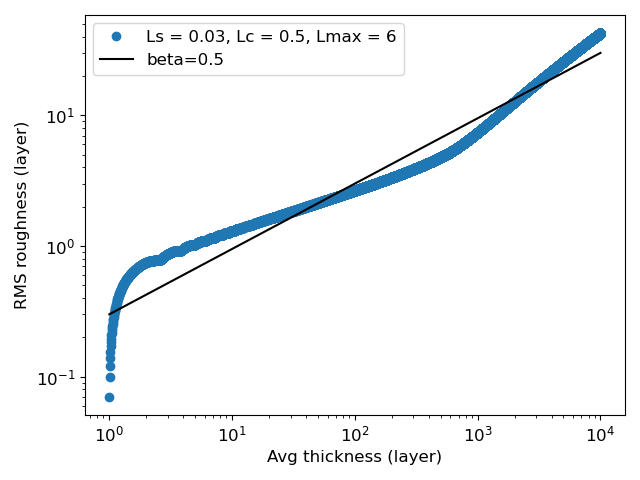

In [35]:
plt.figure()

plt.plot(avg_h,rms,'o',label='Ls = 0.03, Lc = 0.5, Lmax = 6')
# plt.plot(avg_h,np.sqrt(avg_h),color='black',label='RD')
plt.plot(avg_h,0.3*np.sqrt(avg_h),color='black',label='beta=0.5')


# i = 0
# j = i+100000

# popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# print(popt)
# fit = p_law(avg_h[i:j],*popt)

# plt.plot(avg_h[i:j],fit)

# plt.xlim(-100,2000)
# plt.ylim(-0.5,15)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avg thickness (layer)',fontsize=12)
plt.ylabel('RMS roughness (layer)',fontsize=12)
plt.tick_params(labelsize=12)

plt.legend(fontsize=12)

plt.tight_layout()

In [8]:
for i in range(int(len(avg_h)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h[begin:end], rms[begin:end])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h[begin],avg_h[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h[-100000:], rms[-100000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h[-100000],avg_h[-1],popt[0],popt[1]))

1-501 layers: prefactor= 0.528; beta = 0.351
501-1001 layers: prefactor= 0.082; beta = 0.649
1001-1501 layers: prefactor= 0.033; beta = 0.783
1501-2001 layers: prefactor= 0.030; beta = 0.796
2001-2501 layers: prefactor= 0.032; beta = 0.789
2501-3001 layers: prefactor= 0.034; beta = 0.779
3001-3501 layers: prefactor= 0.037; beta = 0.769
3501-4001 layers: prefactor= 0.040; beta = 0.760
4001-4501 layers: prefactor= 0.043; beta = 0.752
4501-5001 layers: prefactor= 0.045; beta = 0.745
5001-5501 layers: prefactor= 0.048; beta = 0.739
5501-6001 layers: prefactor= 0.050; beta = 0.733
6001-6501 layers: prefactor= 0.052; beta = 0.729
6501-7001 layers: prefactor= 0.054; beta = 0.724
7001-7501 layers: prefactor= 0.056; beta = 0.720
7501-8001 layers: prefactor= 0.058; beta = 0.717
8001-8501 layers: prefactor= 0.060; beta = 0.713
8501-9001 layers: prefactor= 0.061; beta = 0.710
9001-9501 layers: prefactor= 0.063; beta = 0.707
9501-10000 layers: prefactor= 0.065; beta = 0.704


In [8]:
avg_h = np.loadtxt('avg_h_16.csv')
rms = np.loadtxt('rms_16.csv')

<IPython.core.display.Javascript object>


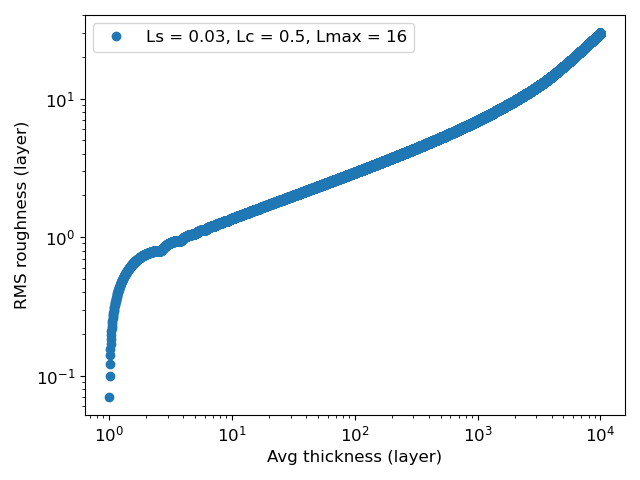

In [12]:
plt.figure()

plt.plot(avg_h,rms,'o',label='Ls = 0.03, Lc = 0.5, Lmax = 16')
# plt.plot(avg_h,np.sqrt(avg_h),color='black',label='RD')

# i = 0
# j = i+100000

# popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# print(popt)
# fit = p_law(avg_h[i:j],*popt)

# plt.plot(avg_h[i:j],fit)

# plt.xlim(-100,2000)
# plt.ylim(-0.5,15)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avg thickness (layer)',fontsize=12)
plt.ylabel('RMS roughness (layer)',fontsize=12)
plt.tick_params(labelsize=12)

plt.legend(fontsize=12)

plt.tight_layout()

In [11]:
for i in range(int(len(avg_h)/100000)-1):
    begin = i*100000
    end = (i+1)*100000
    popt, pcov = curve_fit(p_law, avg_h[begin:end], rms[begin:end])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h[begin],avg_h[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h[-100000:], rms[-100000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h[-100000],avg_h[-1],popt[0],popt[1]))

1-501 layers: prefactor= 0.577; beta = 0.353
501-1001 layers: prefactor= 0.398; beta = 0.414
1001-1501 layers: prefactor= 0.291; beta = 0.459
1501-2001 layers: prefactor= 0.220; beta = 0.497
2001-2501 layers: prefactor= 0.170; beta = 0.531
2501-3001 layers: prefactor= 0.133; beta = 0.563
3001-3501 layers: prefactor= 0.087; beta = 0.616
3501-4001 layers: prefactor= 0.053; beta = 0.676
4001-4501 layers: prefactor= 0.037; beta = 0.719
4501-5001 layers: prefactor= 0.029; beta = 0.749
5001-5501 layers: prefactor= 0.024; beta = 0.770
5501-6001 layers: prefactor= 0.021; beta = 0.786
6001-6501 layers: prefactor= 0.019; beta = 0.797
6501-7001 layers: prefactor= 0.018; beta = 0.805
7001-7501 layers: prefactor= 0.017; beta = 0.811
7501-8001 layers: prefactor= 0.016; beta = 0.815
8001-8501 layers: prefactor= 0.016; beta = 0.817
8501-9001 layers: prefactor= 0.016; beta = 0.819
9001-9501 layers: prefactor= 0.016; beta = 0.820
9501-10000 layers: prefactor= 0.015; beta = 0.821


In [30]:
avg_h = np.loadtxt('avg_h_low_ls.csv')
rms = np.loadtxt('rms_low_ls.csv')

<IPython.core.display.Javascript object>


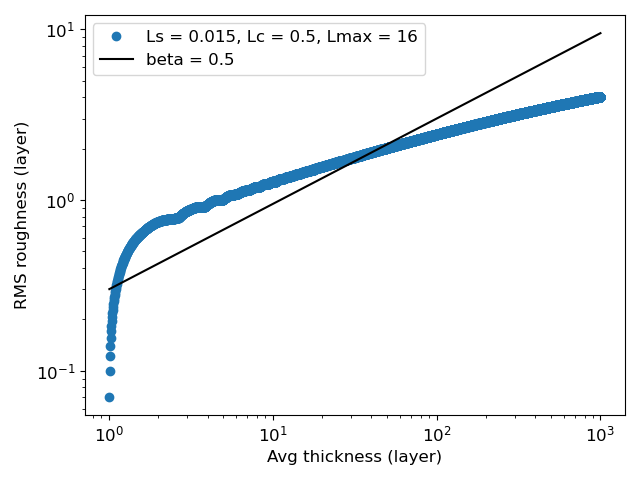

In [32]:
plt.figure()

plt.plot(avg_h,rms,'o',label='Ls = 0.015, Lc = 0.5, Lmax = 16')
plt.plot(avg_h,0.3*np.sqrt(avg_h),color='black',label='beta = 0.5')

# i = 0
# j = i+100000

# popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# print(popt)
# fit = p_law(avg_h[i:j],*popt)

# plt.plot(avg_h[i:j],fit)

# plt.xlim(-100,2000)
# plt.ylim(-0.5,15)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Avg thickness (layer)',fontsize=12)
plt.ylabel('RMS roughness (layer)',fontsize=12)
plt.tick_params(labelsize=12)

plt.legend(fontsize=12)

plt.tight_layout()

In [25]:
for i in range(int(len(avg_h)/1000)-1):
    begin = i*1000
    end = (i+1)*1000
    popt, pcov = curve_fit(p_law, avg_h[begin:end], rms[begin:end])
    print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h[begin],avg_h[end],popt[0],popt[1]))

    
popt, pcov = curve_fit(p_law, avg_h[-1000:], rms[-1000:])
print('%d-%d layers: prefactor= %.3f; beta = %.3f'%(avg_h[-1000],avg_h[-1],popt[0],popt[1]))

1-6 layers: prefactor= 0.500; beta = 0.477
6-11 layers: prefactor= 0.617; beta = 0.340
11-16 layers: prefactor= 0.636; beta = 0.327
16-21 layers: prefactor= 0.650; beta = 0.319
21-26 layers: prefactor= 0.651; beta = 0.319
26-31 layers: prefactor= 0.645; beta = 0.322
31-36 layers: prefactor= 0.646; beta = 0.321
36-41 layers: prefactor= 0.651; beta = 0.319
41-46 layers: prefactor= 0.657; beta = 0.316
46-51 layers: prefactor= 0.663; beta = 0.314
51-56 layers: prefactor= 0.666; beta = 0.313
56-61 layers: prefactor= 0.667; beta = 0.313
61-66 layers: prefactor= 0.665; beta = 0.313
66-71 layers: prefactor= 0.661; beta = 0.315
71-76 layers: prefactor= 0.656; beta = 0.317
76-81 layers: prefactor= 0.654; beta = 0.317
81-86 layers: prefactor= 0.653; beta = 0.318
86-91 layers: prefactor= 0.654; beta = 0.317
91-96 layers: prefactor= 0.655; beta = 0.317
96-101 layers: prefactor= 0.658; beta = 0.316
101-106 layers: prefactor= 0.660; beta = 0.315
106-111 layers: prefactor= 0.663; beta = 0.314
111-116 

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [29]:
# plt.figure()

# avg_h = np.loadtxt('avg_h_16.csv')
# rms = np.loadtxt('rms_16.csv')

# plt.plot(avg_h,rms,'o',label='Ls = 0.03, Lc = 0.5, Lmax = 16')

# avg_h = np.loadtxt('avg_h_low_ls.csv')
# rms = np.loadtxt('rms_low_ls.csv')

# plt.plot(avg_h,rms,'o',label='Ls = 0.015, Lc = 0.5, Lmax = 16')




# plt.plot(avg_h,0.3*np.sqrt(avg_h),color='black',label='RD')

# # i = 0
# # j = i+100000

# # popt, pcov = curve_fit(p_law, avg_h[i:j], rms[i:j])
# # print(popt)
# # fit = p_law(avg_h[i:j],*popt)

# # plt.plot(avg_h[i:j],fit)

# # plt.xlim(-100,2000)
# # plt.ylim(-0.5,15)

# # plt.xscale('log')
# # plt.yscale('log')

# plt.xlabel('Avg thickness (layer)',fontsize=12)
# plt.ylabel('RMS roughness (layer)',fontsize=12)
# plt.tick_params(labelsize=12)

# plt.legend(fontsize=12)

# plt.tight_layout()

<IPython.core.display.Javascript object>


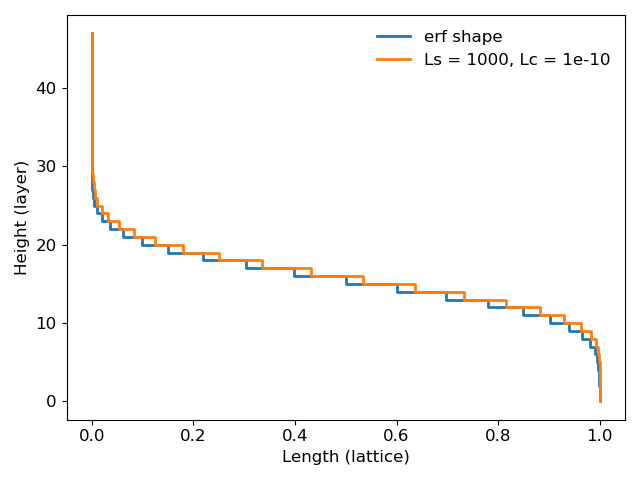

In [7]:
plt.figure()


[xvals, yvals] = create_profile(profile_array_krug)
plt.plot(xvals,yvals,'-',lw=2,label='erf shape')


[xvals, yvals] = create_profile(profile_array_1)
plt.plot(xvals,yvals,'-',lw=2,label='Ls = 1000, Lc = 1e-10')

# plt.xlim(-5,205)
# plt.ylim(4200,4750)

plt.xlabel('Length (lattice)',fontsize=12)
plt.ylabel('Height (layer)',fontsize=12)
plt.tick_params(labelsize=12)
# plt.title('lc=50')

plt.legend(loc=1,fontsize=12,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

plt.tight_layout()

# plt.savefig("Profile_plot.png",dpi=300)

<IPython.core.display.Javascript object>


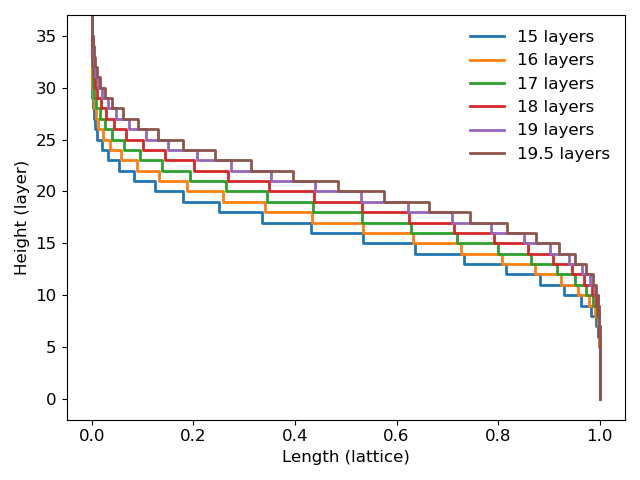

In [8]:
plt.figure()


# [xvals, yvals] = create_profile(profile_array_krug)
# plt.plot(xvals,yvals,'-',lw=2,label='erf shape')


[xvals, yvals] = create_profile(profile_array_1)
plt.plot(xvals,yvals,'-',lw=2,label='15 layers')

[xvals, yvals] = create_profile(profile_array_2)
plt.plot(xvals,yvals,'-',lw=2,label='16 layers')

[xvals, yvals] = create_profile(profile_array_3)
plt.plot(xvals,yvals,'-',lw=2,label='17 layers')

[xvals, yvals] = create_profile(profile_array_4)
plt.plot(xvals,yvals,'-',lw=2,label='18 layers')

[xvals, yvals] = create_profile(profile_array_5)
plt.plot(xvals,yvals,'-',lw=2,label='19 layers')

[xvals, yvals] = create_profile(profile_array_6)
plt.plot(xvals,yvals,'-',lw=2,label='19.5 layers')




# plt.xlim(-5,205)
plt.ylim(-2,37)

plt.xlabel('Length (lattice)',fontsize=12)
plt.ylabel('Height (layer)',fontsize=12)
plt.tick_params(labelsize=12)
# plt.title('lc=50')

plt.legend(loc=1,fontsize=12,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

plt.tight_layout()

# plt.savefig("Profile_plot.png",dpi=300)

In [9]:
profile_array_full_1 = np.loadtxt('test_profile.csv')


<IPython.core.display.Javascript object>


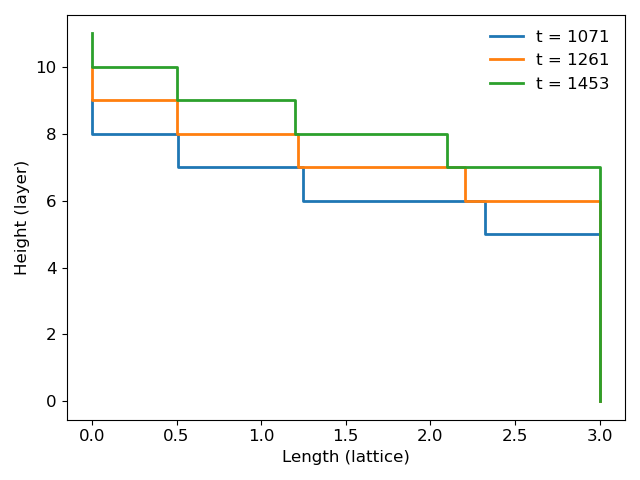

In [10]:
plt.figure()




t1 = 1071
[xvals, yvals] = create_profile(profile_array_full_1[t1])
plt.plot(xvals,yvals,'-',lw=2,label='t = %s'%t1)

t1 = 1261
[xvals, yvals] = create_profile(profile_array_full_1[t1])
plt.plot(xvals,yvals,'-',lw=2,label='t = %s'%t1)

t1 = 1453
[xvals, yvals] = create_profile(profile_array_full_1[t1])
plt.plot(xvals,yvals,'-',lw=2,label='t = %s'%t1)






# plt.xlim(-5,205)
# plt.ylim(-2,37)

plt.xlabel('Length (lattice)',fontsize=12)
plt.ylabel('Height (layer)',fontsize=12)
plt.tick_params(labelsize=12)
# plt.title('lc=50')

plt.legend(loc=1,fontsize=12,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

plt.tight_layout()

# plt.savefig("Profile_plot.png",dpi=300)

In [11]:
profile_array_L1 = np.loadtxt('L1.csv')
profile_array_L2 = np.loadtxt('L2.csv')
profile_array_L3 = np.loadtxt('L3.csv')
profile_array_L4 = np.loadtxt('L4.csv')
profile_array_L5 = np.loadtxt('L5.csv')
profile_array_L6 = np.loadtxt('L6.csv')
profile_array_L10 = np.loadtxt('L10.csv')
profile_array_L20 = np.loadtxt('L20.csv')
profile_array_L50 = np.loadtxt('L50.csv')
profile_array_L100 = np.loadtxt('L100.csv')


<IPython.core.display.Javascript object>


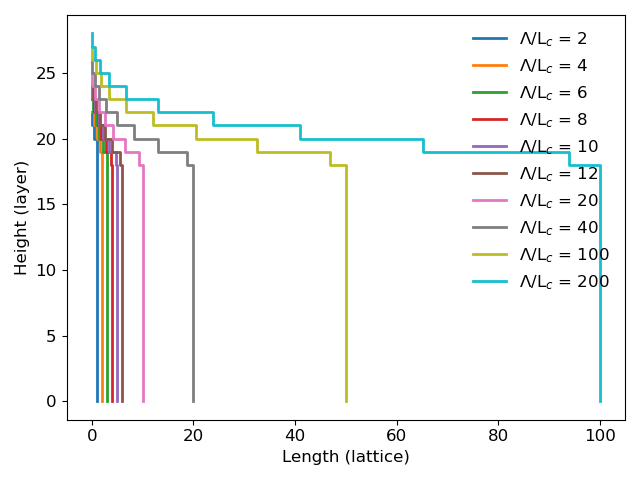

In [12]:
plt.figure()

[xvals, yvals] = create_profile(profile_array_L1)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 2')

[xvals, yvals] = create_profile(profile_array_L2)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 4')

[xvals, yvals] = create_profile(profile_array_L3)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 6')

[xvals, yvals] = create_profile(profile_array_L4)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 8')

[xvals, yvals] = create_profile(profile_array_L5)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 10')

[xvals, yvals] = create_profile(profile_array_L6)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 12')

[xvals, yvals] = create_profile(profile_array_L10)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 20')

[xvals, yvals] = create_profile(profile_array_L20)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 40')

[xvals, yvals] = create_profile(profile_array_L50)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 100')

[xvals, yvals] = create_profile(profile_array_L100)
plt.plot(xvals,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 200')


# plt.xlim(-5,205)
# plt.ylim(-2,37)

plt.xlabel('Length (lattice)',fontsize=12)
plt.ylabel('Height (layer)',fontsize=12)
plt.tick_params(labelsize=12)
# plt.title('lc=50')

plt.legend(loc=1,fontsize=12,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

plt.tight_layout()

# plt.savefig("Profile_plot.png",dpi=300)

<IPython.core.display.Javascript object>


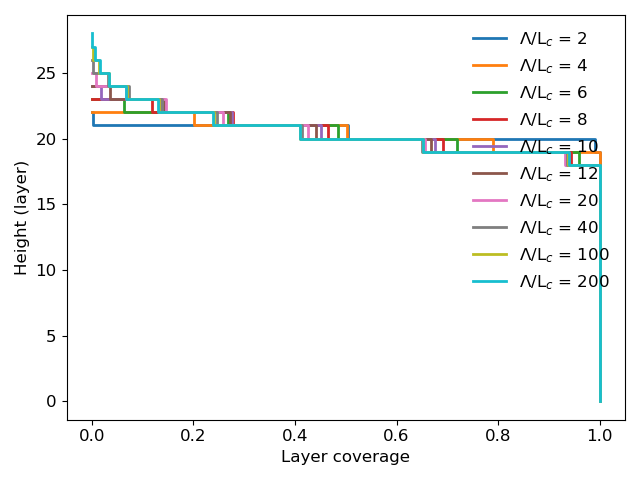

In [13]:
plt.figure()

[xvals, yvals] = create_profile(profile_array_L1)
plt.plot(xvals/1,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 2')

[xvals, yvals] = create_profile(profile_array_L2)
plt.plot(xvals/2,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 4')

[xvals, yvals] = create_profile(profile_array_L3)
plt.plot(xvals/3,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 6')

[xvals, yvals] = create_profile(profile_array_L4)
plt.plot(xvals/4,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 8')

[xvals, yvals] = create_profile(profile_array_L5)
plt.plot(xvals/5,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 10')

[xvals, yvals] = create_profile(profile_array_L6)
plt.plot(xvals/6,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 12')

[xvals, yvals] = create_profile(profile_array_L10)
plt.plot(xvals/10,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 20')

[xvals, yvals] = create_profile(profile_array_L20)
plt.plot(xvals/20,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 40')

[xvals, yvals] = create_profile(profile_array_L50)
plt.plot(xvals/50,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 100')

[xvals, yvals] = create_profile(profile_array_L100)
plt.plot(xvals/100,yvals,'-',lw=2,label='$\Lambda$/L$_c$ = 200')


# plt.xlim(-5,205)
# plt.ylim(-2,37)

plt.xlabel('Layer coverage',fontsize=12)
plt.ylabel('Height (layer)',fontsize=12)
plt.tick_params(labelsize=12)
# plt.title('lc=50')

plt.legend(loc=1,fontsize=12,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

plt.tight_layout()

# plt.savefig("Profile_plot.png",dpi=300)

In [14]:
L_array = np.array([1,2,3,4,5,6,10,20,50,100])

avg_h = [20.496209755261066,20.11346157303861,20.327094482262446,20.159907898928978,20.426650299359054,
         20.364609345318833,20.454768436418515,20.477152262520587,20.47988884620856,20.490149197794143]

<IPython.core.display.Javascript object>


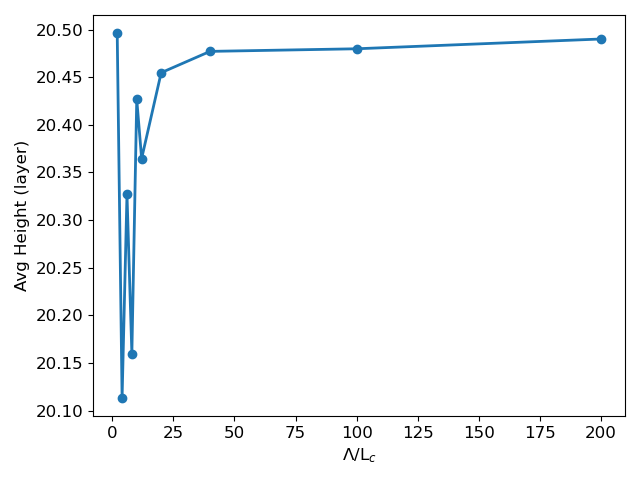

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [16]:
plt.figure()

plt.plot(L_array*2,avg_h,'-o',lw=2)

plt.xlabel(r'$\Lambda$/L$_c$',fontsize=12)
plt.ylabel('Avg Height (layer)',fontsize=12)
plt.tick_params(labelsize=12)
# plt.title('lc=50')

plt.legend(loc=1,fontsize=12,frameon=False)

# ax = plt.gca()
# ax.spines['top'].set_linewidth(5)
# ax.spines['bottom'].set_linewidth(5)
# ax.spines['left'].set_linewidth(5)
# ax.spines['right'].set_linewidth(5)
# ax.tick_params(width=5,length=15,direction='out')

plt.tight_layout()

# plt.savefig("Profile_plot.png",dpi=300)